In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Extracting the data 
df = pd.read_csv('Reviews_data.csv')
df

,Unnamed: 0,Product_Review,Ratings
0,0,This is thing I want to be...It s worked suprb...,5
1,1,I writing review for this product after same d...,5
2,2,Great product... happy with the purchase,4
3,3,Good product,4
4,4,Must buy product .Value for money,5
...,...,...,...
23220,7796,So I'm a pubg player & bought it after viewing...,5
23221,7797,A good wired Headset indeed. I am using Boat b...,5
23222,7798,Sound quality and built is pretty good actuall...,4
23223,7799,Good product for this prize best clear sound a...,5


In [3]:
#Checking the Unique Values

df.Ratings.unique()

array([5, 4, 3, 1, 2], dtype=int64)

In [4]:
Rating_count = df['Ratings'].value_counts(normalize=True)
Rating_count

5    0.591216
4    0.273584
1    0.071216
3    0.043961
2    0.020022
Name: Ratings, dtype: float64

In [5]:
#Checking Null Values

df.isnull().values.any()

False

In [6]:
#Removing All NaN From the Dataset For Reducing the Confusion
df. dropna()

,Unnamed: 0,Product_Review,Ratings
0,0,This is thing I want to be...It s worked suprb...,5
1,1,I writing review for this product after same d...,5
2,2,Great product... happy with the purchase,4
3,3,Good product,4
4,4,Must buy product .Value for money,5
...,...,...,...
23220,7796,So I'm a pubg player & bought it after viewing...,5
23221,7797,A good wired Headset indeed. I am using Boat b...,5
23222,7798,Sound quality and built is pretty good actuall...,4
23223,7799,Good product for this prize best clear sound a...,5


In [7]:
#Checking the columns
df.columns

Index(['Unnamed: 0', 'Product_Review', 'Ratings'], dtype='object')

In [8]:
#dataset having extra columns - remove


df.drop(columns=['Unnamed: 0'],axis=1, inplace = True)


In [9]:
df

,Product_Review,Ratings
0,This is thing I want to be...It s worked suprb...,5
1,I writing review for this product after same d...,5
2,Great product... happy with the purchase,4
3,Good product,4
4,Must buy product .Value for money,5
...,...,...
23220,So I'm a pubg player & bought it after viewing...,5
23221,A good wired Headset indeed. I am using Boat b...,5
23222,Sound quality and built is pretty good actuall...,4
23223,Good product for this prize best clear sound a...,5


In [10]:
print ('Shape => ',df.shape)

Shape =>  (23225, 2)


In [12]:
#New Columns for length of message

df['Length'] = df.Product_Review.str.len()
df

,Product_Review,Ratings,Length
0,This is thing I want to be...It s worked suprb...,5,94
1,I writing review for this product after same d...,5,181
2,Great product... happy with the purchase,4,40
3,Good product,4,12
4,Must buy product .Value for money,5,33
...,...,...,...
23220,So I'm a pubg player & bought it after viewing...,5,182
23221,A good wired Headset indeed. I am using Boat b...,5,214
23222,Sound quality and built is pretty good actuall...,4,197
23223,Good product for this prize best clear sound a...,5,54


In [13]:
#Convert all messages to lower case

df['Product_Review'] = df['Product_Review'].str.lower()
df

,Product_Review,Ratings,Length
0,this is thing i want to be...it s worked suprb...,5,94
1,i writing review for this product after same d...,5,181
2,great product... happy with the purchase,4,40
3,good product,4,12
4,must buy product .value for money,5,33
...,...,...,...
23220,so i'm a pubg player & bought it after viewing...,5,182
23221,a good wired headset indeed. i am using boat b...,5,214
23222,sound quality and built is pretty good actuall...,4,197
23223,good product for this prize best clear sound a...,5,54


In [14]:
# Remove punctuation
df['Product_Review'] = df['Product_Review'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['Product_Review'] = df['Product_Review'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['Product_Review'] = df['Product_Review'].str.replace(r'^\s+|\s+?$', '')

In [15]:
# 'float' to 'String' type. 
df['Product_Review'] = df['Product_Review'].astype(str)

In [16]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['Product_Review'] = df['Product_Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [17]:
#New Column (Clean_Lenght) after Punctuations, stopswords removal

df['clean_length'] = df.Product_Review.str.len()
df

,Product_Review,Ratings,Length,clean_length
0,thing want worked suprb fast due ssd value mon...,5,94,61
1,writing review product day used really good la...,5,181,127
2,great product happy purchase,4,40,28
3,good product,4,12,12
4,must buy product value money,5,33,28
...,...,...,...,...
23220,pubg player bought viewing reviews youtube nd ...,5,182,118
23221,good wired headset indeed using boat bass head...,5,214,131
23222,sound quality built pretty good actually bass ...,4,197,124
23223,good product prize best clear sound basss,5,54,41


In [19]:
#Total Lenght Removed

print("Original Length",df.Length.sum())
print("Clean Length",df.clean_length.sum())

print("\n","Removed Data % ---> ", round((df.clean_length.sum() / df.Length.sum())*100),"%")

Original Length 2521317
Clean Length 1711573

 Removed Data % --->  68 %


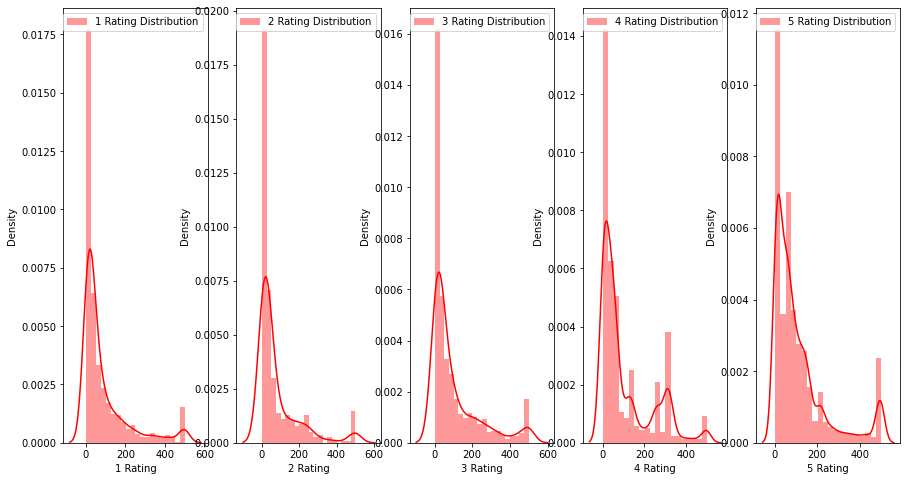

In [20]:
#Message distribution before cleaning

f,ax = plt.subplots(1,5,figsize =(15,8))

sns.distplot(df[df['Ratings']==1]['Length'],bins=20,ax=ax[0],label='1 Rating Distribution',color='r')

ax[0].set_xlabel("1 Rating")
ax[0].legend()

sns.distplot(df[df['Ratings']==2]['Length'],bins=20,ax=ax[1],label='2 Rating Distribution',color='r')

ax[1].set_xlabel("2 Rating")
ax[1].legend()

sns.distplot(df[df['Ratings']==3]['Length'],bins=20,ax=ax[2],label='3 Rating Distribution',color='r')

ax[2].set_xlabel("3 Rating")
ax[2].legend()


sns.distplot(df[df['Ratings']==4]['Length'],bins=20,ax=ax[3],label='4 Rating Distribution',color='r')

ax[3].set_xlabel("4 Rating")
ax[3].legend()

sns.distplot(df[df['Ratings']==5]['Length'],bins=20,ax=ax[4],label='5 Rating Distribution',color='r')

ax[4].set_xlabel("5 Rating")
ax[4].legend()


plt.show()

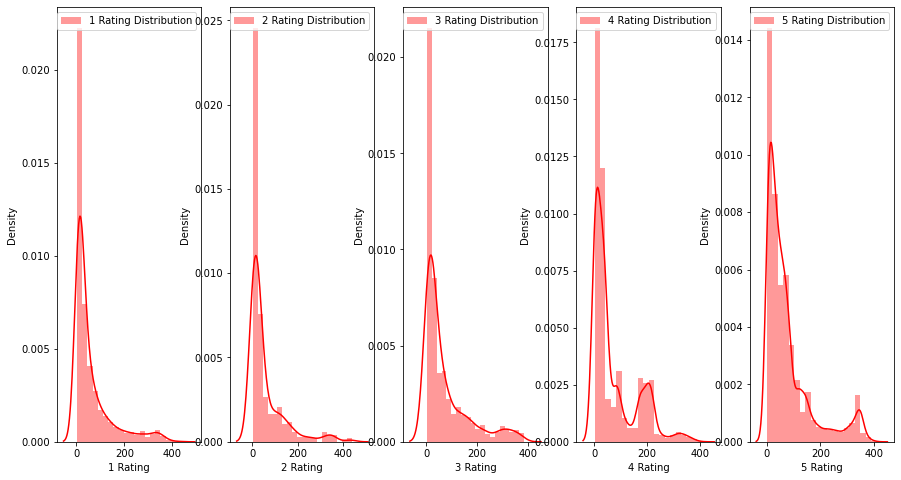

In [21]:
#Message distribution After cleaning

f,ax = plt.subplots(1,5,figsize =(15,8))

sns.distplot(df[df['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='1 Rating Distribution',color='r')

ax[0].set_xlabel("1 Rating")
ax[0].legend()

sns.distplot(df[df['Ratings']==2]['clean_length'],bins=20,ax=ax[1],label='2 Rating Distribution',color='r')

ax[1].set_xlabel("2 Rating")
ax[1].legend()

sns.distplot(df[df['Ratings']==3]['clean_length'],bins=20,ax=ax[2],label='3 Rating Distribution',color='r')

ax[2].set_xlabel("3 Rating")
ax[2].legend()


sns.distplot(df[df['Ratings']==4]['clean_length'],bins=20,ax=ax[3],label='4 Rating Distribution',color='r')

ax[3].set_xlabel("4 Rating")
ax[3].legend()

sns.distplot(df[df['Ratings']==5]['clean_length'],bins=20,ax=ax[4],label='5 Rating Distribution',color='r')

ax[4].set_xlabel("5 Rating")
ax[4].legend()


plt.show()

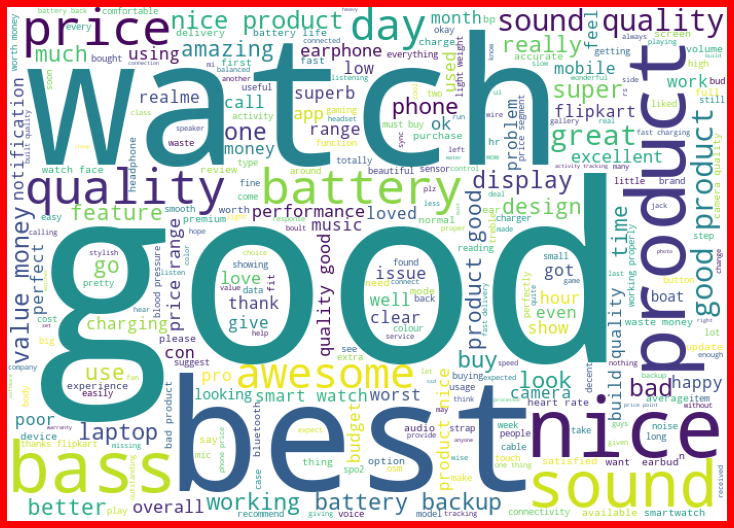

In [22]:
#Getting sense of loud words in Review of 1 rating

from wordcloud import WordCloud

Rating_1 = df['Product_Review'][df['Ratings']==1]

spam_cloud = WordCloud(width=700,
                      height=500,
                      background_color='white',
                      max_words=300).generate(" ".join(Rating_1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

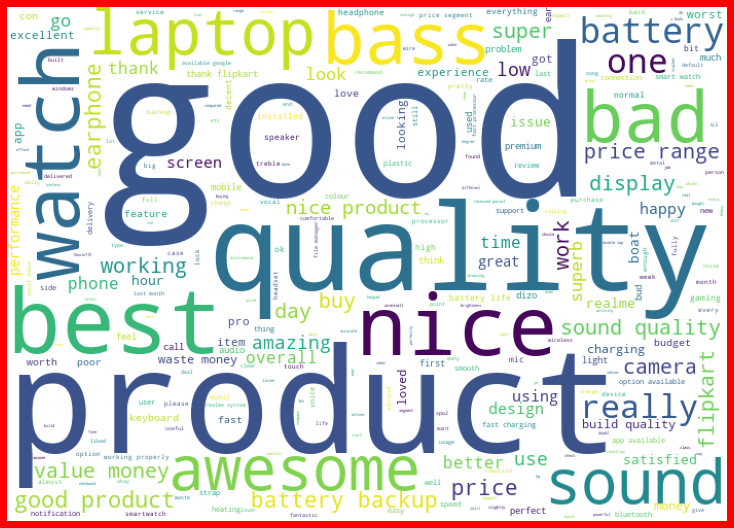

In [23]:
#Getting sense of loud words in Review of 2 rating

from wordcloud import WordCloud

Rating_1 = df['Product_Review'][df['Ratings']==2]

spam_cloud = WordCloud(width=700,
                      height=500,
                      background_color='white',
                      max_words=300).generate(" ".join(Rating_1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

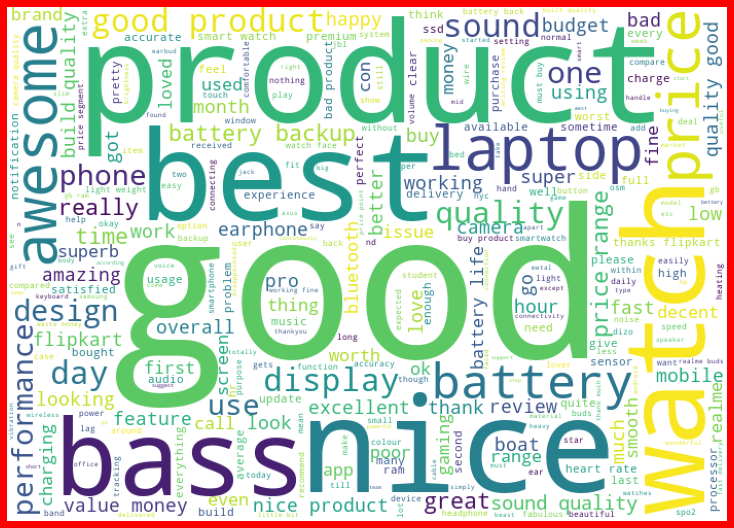

In [24]:
#Getting sense of loud words in Review of 3 rating

from wordcloud import WordCloud

Rating_1 = df['Product_Review'][df['Ratings']==3]

spam_cloud = WordCloud(width=700,
                      height=500,
                      background_color='white',
                      max_words=300).generate(" ".join(Rating_1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

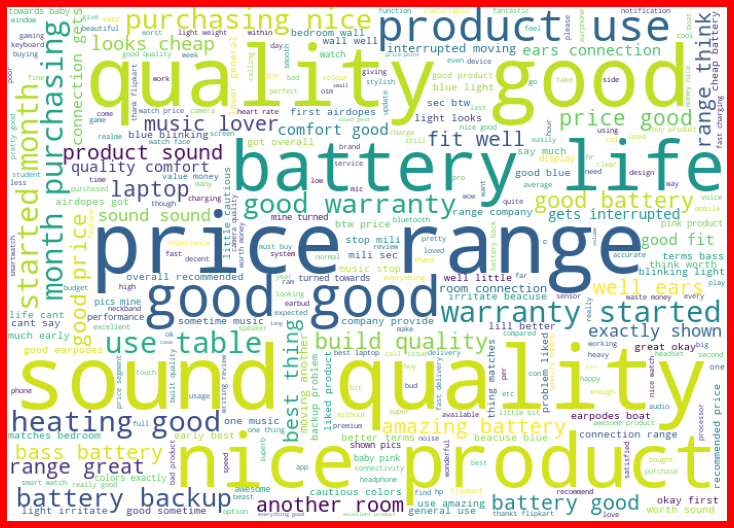

In [25]:
#Getting sense of loud words in Review of 4 rating

from wordcloud import WordCloud

Rating_1 = df['Product_Review'][df['Ratings']==4]

spam_cloud = WordCloud(width=700,
                      height=500,
                      background_color='white',
                      max_words=300).generate(" ".join(Rating_1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

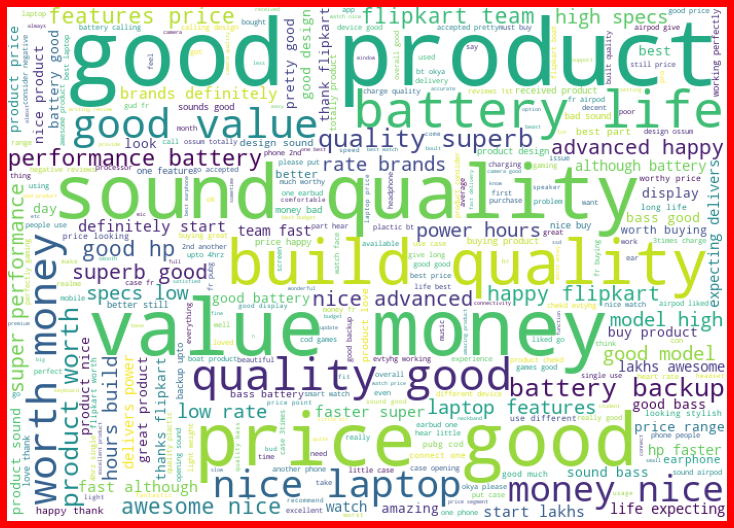

In [26]:
#Getting sense of loud words in Review of 5 rating

from wordcloud import WordCloud

Rating_1 = df['Product_Review'][df['Ratings']==5]

spam_cloud = WordCloud(width=700,
                      height=500,
                      background_color='white',
                      max_words=300).generate(" ".join(Rating_1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
# 1.convert text into vectors using TF-IDF
# 2.Instantiate MultinomialNB Classifier
# 3.Split feature and lable

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Importing train_test_split, Logistic Regression and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

tf_vec = TfidfVectorizer()



features = tf_vec.fit_transform(df['Product_Review'])

x = features

y = df['Ratings']

In [28]:
x.shape

(23225, 7348)

In [29]:
y.shape

(23225,)

In [30]:
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,52):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(x_train,y_train)
        pred=reg.predict(x_test)
        acc_score=accuracy_score(y_test,pred)
        print("Accuracy score at random state", r_state, "is", acc_score)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("Maximum Accuracy Score", max_score, "is achieved at", final_r_state)
    return max_score

In [31]:
lr=LogisticRegression()
max_acc_score(lr,x,y)

Accuracy score at random state 42 is 0.7231431646932185
Accuracy score at random state 43 is 0.7171151776103337
Accuracy score at random state 44 is 0.6988159311087191
Accuracy score at random state 45 is 0.7067814854682454
Accuracy score at random state 46 is 0.7093649085037675
Accuracy score at random state 47 is 0.7203444564047363
Accuracy score at random state 48 is 0.7108719052744887
Accuracy score at random state 49 is 0.7050592034445641
Accuracy score at random state 50 is 0.7113024757804091
Accuracy score at random state 51 is 0.7106566200215285
Maximum Accuracy Score 0.7231431646932185 is achieved at 42


0.7231431646932185

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [37]:
#Importing various classification models for testing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [34]:
#Initializing the instance of the model
lr=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [35]:
Rattings_Review= []
Rattings_Review.append(('Logistic Regression',lr))
Rattings_Review.append(('MultinomialNB',mnb))
Rattings_Review.append(('DecisionTreeClassifier',dtc))
Rattings_Review.append(('KNeighborsClassifier',knc))
Rattings_Review.append(('RandomForestClassifier',rfc))
Rattings_Review.append(('AdaBoostClassifier',abc))
Rattings_Review.append(('GradientBoostingClassifier',gbc))

In [38]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in Rattings_Review:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n\n\n')

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.7234833659491193


cross_val_score:  0.6858988159311087


Classification report:
 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       348
           2       0.00      0.00      0.00        99
           3       0.00      0.00      0.00       223
           4       0.78      0.57      0.66      1379
           5       0.71      0.95      0.81      3061

    accuracy                           0.72      5110
   macro avg       0.30      0.30      0.29      5110
weighted avg       0.64      0.72      0.67      5110



Confusion matrix: 

[[   0    0    0   39  309]
 [   0    0    0   16   83]
 [   1    0    0   17  205]
 [   2    0    0  788  589]
 [   7    0    0  145 2909]]




****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.6908023483365949


cross_v

In [39]:
#Final Output
Final=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs})
Final

,Model,Accuracy_score,Cross_val_score
0,Logistic Regression,72.348337,68.589882
1,MultinomialNB,69.080235,66.673843
2,DecisionTreeClassifier,66.164384,57.562971
3,KNeighborsClassifier,65.949119,60.490850
4,RandomForestClassifier,70.156556,67.728741
5,AdaBoostClassifier,72.426614,70.764263
6,GradientBoostingClassifier,72.544031,69.515608


GradientBoostingClassifier Model seem to a good fit among all the other models

In [44]:
import pickle
filename='Rating_Prediction_Project.pkl'
pickle.dump(gbc,open(filename,'wb'))

In [45]:
a=np.array(y_test)
a

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [46]:
gbc_prediction=gbc.predict(x)

#Making a dataframe of predictions
rating_prediction=pd.DataFrame({'Predictions':gbc_prediction})
rating_prediction

,Predictions
0,5
1,5
2,5
3,5
4,5
...,...
23220,5
23221,5
23222,5
23223,5
